# Task 4: Autoencoder
Dmytro Geleshko

## Imports

In [17]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn import metrics

## TF Config

In [18]:
tf.test.is_built_with_cuda()

True

In [19]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Data
### Loading

In [20]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Train X:", X_train.shape, X_train.dtype)
print("Train y:", y_train.shape, y_train.dtype)
print("Test X:", X_test.shape, X_test.dtype)
print("Test y:", y_test.shape, y_test.dtype)

Train X: (60000, 28, 28) uint8
Train y: (60000,) uint8
Test X: (10000, 28, 28) uint8
Test y: (10000,) uint8


### Preview

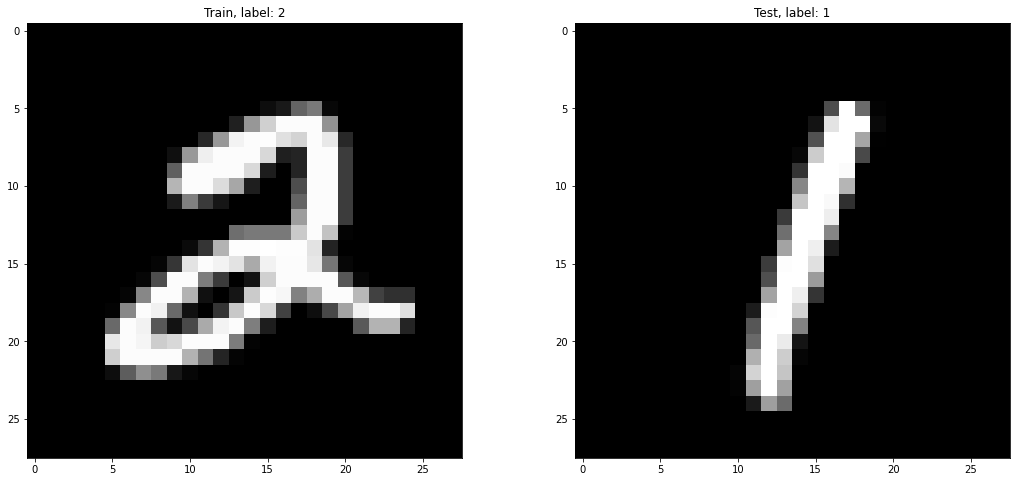

In [21]:
example = 5
plt.rcParams["figure.figsize"] = (18, 8)

plt.subplot(1, 2, 1)
plt.imshow(X_train[example], "gray")
plt.title("Train, label: " + str(y_train[example]))

plt.subplot(1, 2, 2)
plt.imshow(X_test[example], "gray")
plt.title("Test, label: " + str(y_test[example]))

plt.show()

### A little preprocessing

In [22]:
X_train = (X_train.reshape(-1, 28 * 28) / 255).astype(np.float32)
X_test = (X_train.reshape(-1, 28 * 28) / 255).astype(np.float32)


print("Train X:", X_train.shape, X_train.dtype)
print("Test X:", X_test.shape, X_test.dtype)

Train X: (60000, 784) float32
Test X: (60000, 784) float32


## Model

### Architecture

In [23]:
def build_model(input_shape, n_classes):
    X_in = keras.Input(input_shape)

    X = layers.Dense(256)(X_in)
    X = layers.ReLU()(X)

    X = layers.Dense(128)(X)
    X = layers.ReLU()(X)

    X = layers.Dense(64)(X)
    X = layers.ReLU()(X)

    X = layers.Dense(n_classes)(X)
    X = layers.Softmax()(X)
    return keras.Model(inputs=X_in, outputs=X)

In [30]:
model = build_model(784, 10)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 re_lu_3 (ReLU)              (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 re_lu_5 (ReLU)              (None, 64)                0   

In [31]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

### Train

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.05, validation_batch_size=32)

TypeError: 'History' object is not subscriptable

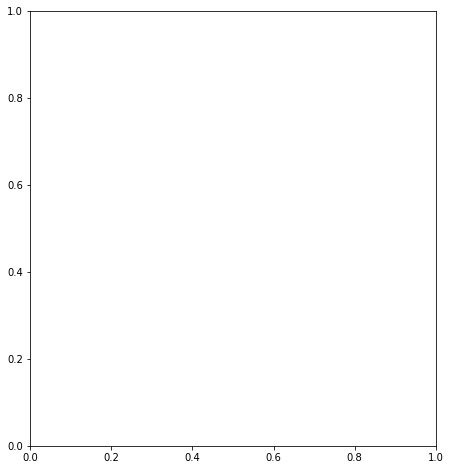

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="dev")
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["categorical_accuracy"], label="train")
plt.plot(history.history["val_categorical_accuracy"], label="dev")
plt.legend()
plt.title("categorical_accuracy")

plt.show()